In [2]:
import numpy as np
def PCA(X, n_components = 2):
    cov_X = np.cov(X, rowvar = False)
    eig_val, eig_vect = np.linalg.eig(cov_X)
    eig_inds = np.flip(np.argsort(eig_val))
    return np.matmul(X, eig_vect[:,eig_inds[:n_components]]), np.take_along_axis(eig_val, eig_inds, axis = 0)

In [63]:
from scipy.io import loadmat
cifar = loadmat('cifar10_data_batch_1.mat')
X = cifar['data']
Y = cifar['labels']

ind1 = np.where(Y==[3])
ind2 = np.where(Y==[4])
ind3 = np.where(Y==[7])
ind4 = np.where(Y==[8])
e = [ind1[0],ind2[0],ind3[0],ind4[0]]
e = [y for x in e for y in x]
Y1 = Y[e]
X1 = X[e]

In [66]:
reduced_X, eig_vals = PCA(X1, n_components = 2)

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [70]:
cY = Y1[:,0]

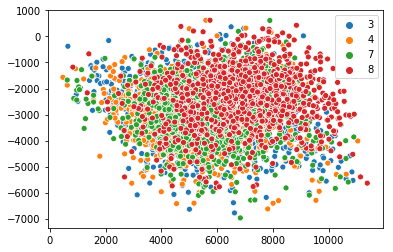

In [78]:
sns.scatterplot(reduced_X[:,0],reduced_X[:,1], hue=cY, palette=sns.color_palette(n_colors=4))

In [82]:
colours = sns.color_palette()

In [83]:
colours[1]

(1.0, 0.4980392156862745, 0.054901960784313725)

In [10]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def LDA_dimensionality(X, y):

    label_ = list(set(y))
    X_classify = {}

    for label in label_:
        X1 = np.array([X[i] for i in range(len(X)) if y[i] == label])
        X_classify[label] = X1

    mu = np.mean(X, axis=0)
    mu_classify = {}

    for label in label_:
        mu1 = np.mean(X_classify[label], axis=0)
        mu_classify[label] = mu1

    Sb = np.zeros((len(mu), len(mu)))  # Calculate the between-class matrix
    for i in label_:
        Sb += len(X_classify[i]) * np.dot((mu_classify[i] - mu).reshape((len(mu), 1)), (mu_classify[i] - mu).reshape((1, len(mu))))
    print(np.around(Sb, decimals=4, out=None))

    return 0

In [11]:
if '__main__' == __name__:
    
    iris = load_iris()
    X = iris.data[:,0:2]
    y = iris.target
    W = LDA_dimensionality(X, y)
    

[[ 63.2121 -19.9527]
 [-19.9527  11.3449]]
